In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Import du Dataset

In [234]:
data = pd.read_csv('data.csv')

In [235]:
data.head()

,num_ligne,ID_Client,Nom,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Encodage de la variable Sex

In [236]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data.Sex = encoder.fit_transform(data.Sex)

## Visualisation des corrélations

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
ax = sns.heatmap(data.corr(), annot=True)

## Selection des variables

In [237]:
X = data.iloc[:, :13].copy()
y = data.Exited.copy()

X = X.drop(['num_ligne', 'ID_Client', 'Nom', 'Score_Credit', 'Pays', 'Tenure', 'Num_Produit', 'il_a_CrCard', 'Salaire_estime'], axis=1)
X.head()

,Sex,Age,Balance,Membre_actif
0,0,42,0.00,1
1,0,41,83807.86,1
2,0,42,159660.80,0
3,0,39,0.00,0
4,0,43,125510.82,1


## Standardisation des variables

In [238]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

## Séparation jeu de données entrainement / test

In [239]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 2000)

In [240]:
donnees_train = X_train
donnees_test = X_test
index_train = [i for i in range(len(donnees_train))]
index_test = [i for i in range(len(donnees_test))]
colonnes = ['Sex', 'Age','Balance','Membre_actif']

X_train = pd.DataFrame(data=donnees_train,index=index_train, columns=colonnes)
X_test = pd.DataFrame(data=donnees_test,index=index_test, columns=colonnes)

## Création du réseau de neuronne et entrainement

In [245]:
model = keras.Sequential()
model.add(layers.Dense(32, input_dim= 4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

In [243]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5384 - accuracy: 0.7571
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4481 - accuracy: 0.8086
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4454 - accuracy: 0.8108
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4362 - accuracy: 0.8234
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4309 - accuracy: 0.8303
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4353 - accuracy: 0.8239
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.8255
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.8251
Epoch 9/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4436 - accuracy: 0.8212
Epoch 10/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.8310

## Evaluation du modèle

In [244]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2, batch_size=128)

print("Précision : ", test_acc)

16/16 - 0s - loss: 0.4171 - accuracy: 0.8330
Précision :  0.8330000042915344


In [229]:
#predictions = model.predict(X_test) 
#rounded = [round(x[0]) for x in predictions]

predictions = model.predict_classes(X_test)

C:\Users\utilisateur\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [230]:
np.unique(predictions)

array([0, 1])

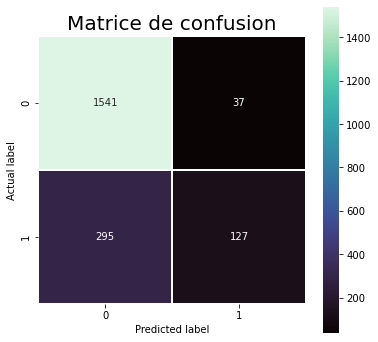

In [231]:
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'mako')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Matrice de confusion", size = 20)
plt.show()